In [1]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'cosine_distance.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,Name,test_exact_match,test_f1,Runtime,Notes,State,Tags,eval/loss,eval/runtime,eval/samples_per_second,...,train/global_step,train/learning_rate,train/loss,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1
0,th_wordnet_aug_1.0,39.575662,54.099859,3011,-,finished,NaN,2.364525,5.1050,441.916,...,5640,0,0.1326,76607636381752320,0.790639,2867.3967,125.842,1.967,51.329787,62.947724
1,th_wordnet_aug_0.9,40.294582,54.295754,2871,-,finished,NaN,2.357939,5.1034,442.058,...,5360,0,0.1620,72777679169894400,0.836683,2727.1321,125.700,1.965,49.379433,61.372919
2,th_wordnet_aug_0.8,38.997019,53.889524,2732,-,finished,NaN,2.198472,5.1039,442.015,...,5080,0,0.1241,68947721958036480,0.841739,2589.0343,125.437,1.962,49.645390,61.390519
3,th_wordnet_aug_0.7,40.522532,54.269615,2596,-,finished,NaN,2.172062,5.1066,441.779,...,4800,0,0.1750,65117764746178560,0.906674,2455.6063,124.906,1.955,50.975177,61.952266
4,th_wordnet_aug_0.6,37.033140,52.975213,2459,-,finished,NaN,2.220396,5.1042,441.990,...,4520,0,0.1403,61287807534320640,0.845333,2320.3382,124.413,1.948,50.487589,62.225778
5,th_wordnet_aug_0.5,37.874803,52.672719,2313,-,finished,NaN,2.052335,5.1119,441.321,...,4220,0,0.1229,57318791454737280,0.862330,2175.7934,124.378,1.940,49.689716,61.418748
6,th_wordnet_aug_0.4,39.733474,53.050482,2174,-,finished,NaN,2.084451,5.1134,441.190,...,3940,0,0.1738,53490108064568450,0.903963,2038.8332,123.885,1.932,50.664894,62.222471
7,th_wordnet_aug_0.3,38.804138,53.735710,2029,-,finished,NaN,1.965081,5.1116,441.350,...,3660,0,0.2114,49661424674399620,0.976911,1900.2045,123.429,1.926,51.108156,62.652332
8,th_wordnet_aug_0.2,38.909346,53.226360,1896,-,finished,NaN,1.928080,5.1099,441.497,...,3380,0,0.2209,45832741284230780,1.009166,1763.6275,122.758,1.917,49.645390,61.364477
9,th_wordnet_aug_0.1,37.787130,52.773388,1754,-,finished,NaN,1.860637,5.1073,441.717,...,3100,0,0.2612,42004057894061950,1.084156,1625.0496,122.126,1.908,50.221631,62.119381


In [2]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
}

In [3]:
# Function to extract the augmentation type from the name
def get_augmentation_type(name):
    if name == "original":
        return "original"
    return name.rsplit("_", 2)[0]

# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name.rsplit("_", 1)[-1]

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    base_name = name.rsplit("_", 1)[0]
    return pretty_names[base_name]


# Apply the function to create a new column with the augmentation type
data['augmentation_type'] = data['Name'].apply(get_augmentation_type)

# Find the best performing model for each augmentation type based on the "test_exact_match" metric
best_models = data.loc[data.groupby('augmentation_type')['test_exact_match'].idxmax()]

# Resetting the index
best_models.reset_index(drop=True, inplace=True)

# Apply the functions to create the new columns
best_models['augment_ratio'] = best_models['Name'].apply(get_augment_ratio)
best_models['pretty_name'] = best_models['Name'].apply(get_pretty_name)

# Displaying the results
best_models[['Name', 'pretty_name', 'test_exact_match']]

,Name,pretty_name,test_exact_match
0,original,Original,39.242504
1,th_aug_1.0,Backtranslation,41.381729
2,th_fasttext_aug_0.8,FastText,40.803086
3,th_llm_gec_aug_0.7,LLM GEC,41.083640
4,th_llm_paraphrase_aug_0.5,LLM Paraphrase,40.540067
5,th_ltw2v_aug_1.0,LTW2Vec,40.189374
6,th_qcpg_0.2_aug_0.4,QCPG (0.2),39.417850
7,th_qcpg_0.2_llm_gec_aug_0.2,QCPG (0.2) + LLM GEC,40.259513
8,th_qcpg_0.5_aug_0.7,QCPG (0.5),40.119235
9,th_qcpg_0.5_llm_gec_aug_0.4,QCPG (0.5) + LLM GEC,40.504997


## Table Export

In [4]:
# Selecting columns that begin with "test" along with the "Name" column
test_columns = [col for col in data.columns if col.startswith("test")]
selected_columns = ['pretty_name', 'augment_ratio', "val_exact_match", "val_f1", "test_tydiqa_exact_match", "test_tydiqa_f1", "test_xquad_exact_match", "test_xquad_f1"]

# Selecting the relevant columns from the best models
best_models_test_metrics = best_models[selected_columns]

# Sorting the results by "test_exact_match" in descending order
best_models_test_metrics_sorted = best_models_test_metrics.sort_values(by='test_tydiqa_exact_match', ascending=True)

# Displaying the sorted results
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
0,Original,N/A,50.354610,62.278984,40.636746,55.101966,33.898305,47.915171
6,QCPG (0.2),0.4,49.601064,60.829974,41.123148,54.287219,32.881356,45.600339
8,QCPG (0.5),0.7,49.645390,61.112328,41.720097,54.983745,33.983051,47.679517
7,QCPG (0.2) + LLM GEC,0.2,50.354610,62.080071,41.963299,55.280244,33.728814,47.371280
5,LTW2Vec,1.0,51.196809,62.484083,42.007517,55.898205,33.220339,47.849854
12,Thai2Fit,1.0,51.241135,63.066270,42.206500,56.134349,32.796610,45.984167
4,LLM Paraphrase,0.5,50.886525,62.352358,42.317046,55.670707,33.728814,47.019141
13,WordNet,0.7,50.975177,61.952266,42.383374,55.979663,33.389831,47.714915
9,QCPG (0.5) + LLM GEC,0.4,49.290780,61.644280,42.471811,56.061706,32.966102,46.328062
10,QCPG (0.8),0.7,50.177305,62.113025,42.692903,55.391331,34.915254,47.937018


In [5]:
# Round all numerical columns to 2 decimal places
best_models_test_metrics_sorted = best_models_test_metrics_sorted.round(2)
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
0,Original,N/A,50.35,62.28,40.64,55.10,33.90,47.92
6,QCPG (0.2),0.4,49.60,60.83,41.12,54.29,32.88,45.60
8,QCPG (0.5),0.7,49.65,61.11,41.72,54.98,33.98,47.68
7,QCPG (0.2) + LLM GEC,0.2,50.35,62.08,41.96,55.28,33.73,47.37
5,LTW2Vec,1.0,51.20,62.48,42.01,55.90,33.22,47.85
12,Thai2Fit,1.0,51.24,63.07,42.21,56.13,32.80,45.98
4,LLM Paraphrase,0.5,50.89,62.35,42.32,55.67,33.73,47.02
13,WordNet,0.7,50.98,61.95,42.38,55.98,33.39,47.71
9,QCPG (0.5) + LLM GEC,0.4,49.29,61.64,42.47,56.06,32.97,46.33
10,QCPG (0.8),0.7,50.18,62.11,42.69,55.39,34.92,47.94


In [6]:
from IPython.display import Markdown
# Function to create a markdown table row (corrected)
def create_md_row(row, best_values, ignore_bestval_columns=["pretty_name", "augment_ratio"]):
    md_row = "| "
    for col, value in row.items():  # Using 'items' instead of 'iteritems'
        if value == best_values[col] and col not in ignore_bestval_columns:
            md_row += f"**{value}** | "
        else:
            md_row += f"{value} | "
    return md_row

best_values = best_models_test_metrics_sorted.max()

# Creating markdown table rows (corrected)
md_table_corrected = "| " + " | ".join(selected_columns) + " |\n"
md_table_corrected += "| " + " | ".join(["-" * len(col) for col in selected_columns]) + " |\n"
for _, row in best_models_test_metrics_sorted.iterrows():
    md_table_corrected += create_md_row(row, best_values) + "\n"

# Displaying the corrected markdown table
Markdown(md_table_corrected)

| pretty_name | augment_ratio | val_exact_match | val_f1 | test_tydiqa_exact_match | test_tydiqa_f1 | test_xquad_exact_match | test_xquad_f1 |
| ----------- | ------------- | --------------- | ------ | ----------------------- | -------------- | ---------------------- | ------------- |
| Original | N/A | 50.35 | 62.28 | 40.64 | 55.1 | 33.9 | 47.92 | 
| QCPG (0.2) | 0.4 | 49.6 | 60.83 | 41.12 | 54.29 | 32.88 | 45.6 | 
| QCPG (0.5) | 0.7 | 49.65 | 61.11 | 41.72 | 54.98 | 33.98 | 47.68 | 
| QCPG (0.2) + LLM GEC | 0.2 | 50.35 | 62.08 | 41.96 | 55.28 | 33.73 | 47.37 | 
| LTW2Vec | 1.0 | 51.2 | 62.48 | 42.01 | 55.9 | 33.22 | 47.85 | 
| Thai2Fit | 1.0 | **51.24** | **63.07** | 42.21 | 56.13 | 32.8 | 45.98 | 
| LLM Paraphrase | 0.5 | 50.89 | 62.35 | 42.32 | 55.67 | 33.73 | 47.02 | 
| WordNet | 0.7 | 50.98 | 61.95 | 42.38 | 55.98 | 33.39 | 47.71 | 
| QCPG (0.5) + LLM GEC | 0.4 | 49.29 | 61.64 | 42.47 | 56.06 | 32.97 | 46.33 | 
| QCPG (0.8) | 0.7 | 50.18 | 62.11 | 42.69 | 55.39 | 34.92 | 47.94 | 
| FastText | 0.8 | 50.27 | 61.91 | 42.85 | 56.14 | 32.97 | 47.22 | 
| LLM GEC | 0.7 | 50.31 | 61.84 | 42.91 | **56.38** | 34.07 | 48.08 | 
| Backtranslation | 1.0 | 50.93 | 62.7 | 42.96 | 56.26 | **35.34** | 48.64 | 
| QCPG (0.8) + LLM GEC | 1.0 | 50.53 | 62.47 | **43.25** | 56.08 | 34.92 | **49.03** | 


In [8]:
def add_monolingual_col(df):
    df = df.copy()
    new_col = []

    for i in range(len(df)):
        if "QCPG" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        elif "LLM" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        elif "Back" in df["Augmentation"].iloc[i]:
            new_col.append(False)
        else:
            new_col.append(True)
    
    df["monolingual"] = new_col
    return df

def compute_relative_scores(df):
    df = df.copy()

    # Create a new DataFrame to store the results
    new_df = pd.DataFrame(columns=['Augmentation', 'Ratio', 'Val EM/F1', 'TyDiQA EM/F1', 'XQuAD EM/F1'])

    # Adding the original scores as the first row without difference calculation
    if 'monolingual' in df.columns:
        original_row_len = len(df.iloc[0]) - 1
    else:
        original_row_len = len(df.iloc[0])
    original_row = df.iloc[0]
    new_df.loc[0] = [original_row['pretty_name'], original_row['augment_ratio']] + [f"{original_row[i]:.2f} / {original_row[i + 1]:.2f}" for i in range(2, original_row_len, 2)]

    # Assuming the first row contains the original scores
    original_scores = original_row[2:]

    # Iterate through the remaining rows, combining the EM and F1 columns
    for i in range(1, len(df)):
        row = df.iloc[i]
        combined_scores = []
        if 'monolingual' in df.columns:
            row_len = len(row) - 1
        else:
            row_len = len(row)
        for j in range(2, row_len, 2):
            em_score = row[j] - original_scores[j - 2]
            f1_score = row[j + 1] - original_scores[j - 1]
            
            em_arrow = "\\greenarrowup" if em_score > 0 else "\\redarrowdown" if em_score < 0 else ""
            f1_arrow = "\\greenarrowup" if f1_score > 0 else "\\redarrowdown" if f1_score < 0 else ""
            
            if em_arrow == f1_arrow:
                combined = f"{em_arrow}{{{em_score:.2f} / {f1_score:.2f}}}" if em_arrow else f"{em_score:.2f} / {f1_score:.2f}"
            else:
                combined = f"{em_arrow}{{{em_score:.2f}}} / {f1_arrow}{{{f1_score:.2f}}}"
            
            combined_scores.append(combined)

        # Add the combined scores to the new DataFrame
        new_df.loc[i] = [row['pretty_name'], row['augment_ratio']] + combined_scores
    
    new_df = add_monolingual_col(new_df)
    return new_df

def export_latex_tables(df, filename):
    df = df.copy()
    # Assuming that 'monolingual' column is a boolean column indicating whether the augmentation is monolingual or not
    # Adjust the condition according to your DataFrame
    monolingual_df = df[df['monolingual']]
    cross_lingual_df = df[~df['monolingual']]

    # Drop the 'monolingual' column as it was only used for filtering
    monolingual_df = monolingual_df.drop(columns=['monolingual'])
    cross_lingual_df = cross_lingual_df.drop(columns=['monolingual'])

    # Convert both DataFrames to LaTeX format
    monolingual_latex = monolingual_df.to_latex(index=False, escape=False)
    cross_lingual_latex = cross_lingual_df.to_latex(index=False, escape=False)

    # Combine the LaTeX tables and add a midline between them
    combined_latex = monolingual_latex + "\n\\midrule\n" + cross_lingual_latex

    # Save the combined LaTeX tables to the specified file
    with open(filename, 'w') as file:
        file.write(combined_latex)


export_latex_tables(
        compute_relative_scores(best_models_test_metrics_sorted),
        "cosine_distance.tex"
)

## Best Model Bar Plot

In [4]:
best_runs = data[(data["Name"].str.contains("th_qcpg_0.8") & data["Name"].str.contains("llm_gec")) | data["Name"].str.contains("original")].sort_values("Name")
best_runs

,Name,test_exact_match,test_f1,Runtime,Notes,State,Tags,eval/loss,eval/runtime,eval/samples_per_second,...,train/learning_rate,train/loss,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1,augmentation_type
130,original,39.242504,53.614956,1610,-,finished,NaN,1.761034,5.1082,441.647,...,0,0.3093,38303818190876160,1.140827,1484.6705,121.522,1.899,50.354610,62.278984,original
29,th_qcpg_0.8_llm_gec_aug_0.1,38.769069,53.181102,1764,-,finished,NaN,1.794299,5.1164,440.937,...,0,0.2993,42004057894061950,1.117907,1630.5162,121.716,1.901,49.423759,61.280195,th_qcpg_0.8_llm_gec
28,th_qcpg_0.8_llm_gec_aug_0.2,41.031036,54.434738,1899,-,finished,NaN,1.849829,5.1227,440.391,...,0,0.3023,45832741284230780,1.179095,1767.1810,122.512,1.913,50.177305,61.766259,th_qcpg_0.8_llm_gec
27,th_qcpg_0.8_llm_gec_aug_0.3,40.995967,54.554612,2040,-,finished,NaN,1.879832,5.1214,440.503,...,0,0.2740,49661424674399620,1.138482,1905.8336,123.064,1.920,50.177305,62.093692,th_qcpg_0.8_llm_gec
26,th_qcpg_0.8_llm_gec_aug_0.4,40.785551,53.852605,2179,-,finished,NaN,2.056347,5.1220,440.451,...,0,0.2702,53490108064568450,1.134823,2044.3571,123.550,1.927,49.024823,60.816482,th_qcpg_0.8_llm_gec
25,th_qcpg_0.8_llm_gec_aug_0.5,40.136770,53.798242,2320,-,finished,NaN,1.994385,5.1454,438.451,...,0,0.3077,57318791454737280,1.120248,2183.7479,123.925,1.932,50.753546,62.454543,th_qcpg_0.8_llm_gec
24,th_qcpg_0.8_llm_gec_aug_0.6,39.698404,53.609202,2464,-,finished,NaN,2.128649,5.1392,438.981,...,0,0.2574,61287807534320640,1.093245,2326.1240,124.103,1.943,50.177305,61.513222,th_qcpg_0.8_llm_gec
23,th_qcpg_0.8_llm_gec_aug_0.7,40.820621,53.998372,2605,-,finished,NaN,2.067647,5.1181,440.791,...,0,0.2438,65117764746178560,1.067114,2463.5964,124.501,1.948,50.354610,62.259043,th_qcpg_0.8_llm_gec
22,th_qcpg_0.8_llm_gec_aug_0.8,39.926355,53.543291,2752,-,finished,NaN,2.111989,5.1232,440.347,...,0,0.2517,68947721958036480,1.110754,2601.5952,124.831,1.953,50.354610,61.637914,th_qcpg_0.8_llm_gec
21,th_qcpg_0.8_llm_gec_aug_0.9,39.523058,53.843634,2884,-,finished,NaN,2.224784,5.1236,440.313,...,0,0.2468,72777679169894400,1.064465,2739.6727,125.124,1.956,51.285461,62.167866,th_qcpg_0.8_llm_gec


In [5]:
best_runs["augment_ratio"] = best_runs["Name"].apply(get_augment_ratio)

In [6]:
filter_col_best_runs = best_runs[["Name", "augment_ratio", "val_exact_match", "val_f1", "test_xquad_exact_match", "test_xquad_f1", "test_tydiqa_exact_match", "test_tydiqa_f1"]]
filter_col_best_runs

,Name,augment_ratio,val_exact_match,val_f1,test_xquad_exact_match,test_xquad_f1,test_tydiqa_exact_match,test_tydiqa_f1
130,original,N/A,50.354610,62.278984,33.898305,47.915171,40.636746,55.101966
29,th_qcpg_0.8_llm_gec_aug_0.1,0.1,49.423759,61.280195,32.288136,46.622885,40.459872,54.892068
28,th_qcpg_0.8_llm_gec_aug_0.2,0.2,50.177305,61.766259,33.389831,48.068680,43.024541,56.095571
27,th_qcpg_0.8_llm_gec_aug_0.3,0.3,50.177305,62.093692,35.508475,48.715078,42.427592,56.078081
26,th_qcpg_0.8_llm_gec_aug_0.4,0.4,49.024823,60.816482,34.406780,47.352934,42.449702,55.548296
25,th_qcpg_0.8_llm_gec_aug_0.5,0.5,50.753546,62.454543,33.983051,47.608340,41.742207,55.413118
24,th_qcpg_0.8_llm_gec_aug_0.6,0.6,50.177305,61.513222,33.813559,47.514802,41.233694,55.199163
23,th_qcpg_0.8_llm_gec_aug_0.7,0.7,50.354610,62.259043,33.983051,47.603668,42.604466,55.666679
22,th_qcpg_0.8_llm_gec_aug_0.8,0.8,50.354610,61.637914,33.135593,46.936437,41.697988,55.266945
21,th_qcpg_0.8_llm_gec_aug_0.9,0.9,51.285461,62.167866,33.474576,48.257035,41.101039,55.301115


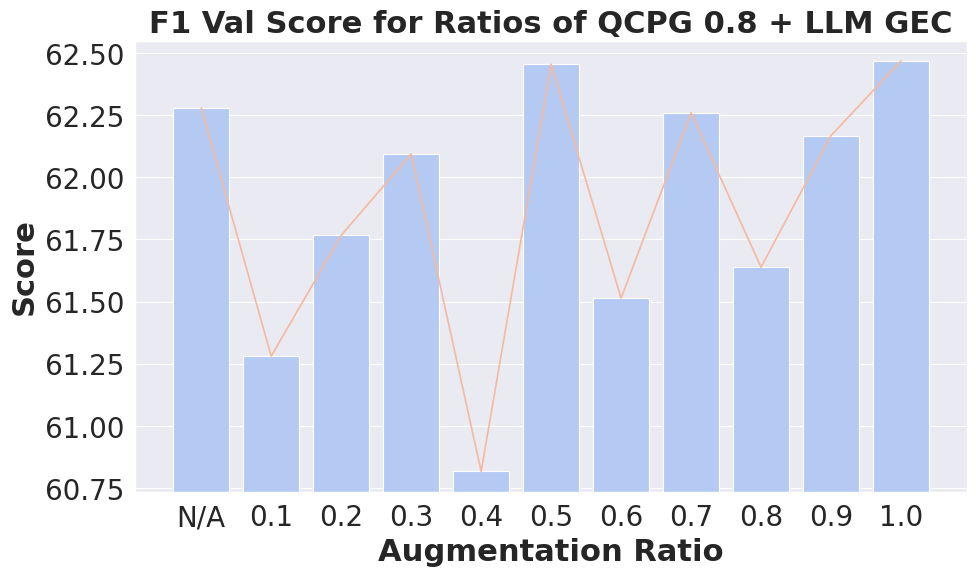

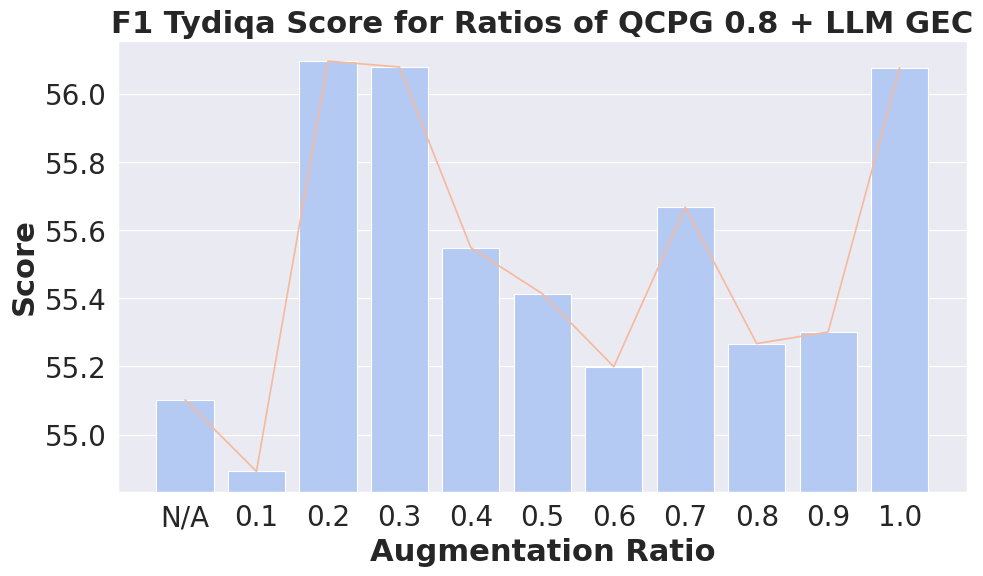

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_scores(dataframe, test_dataset="tydiqa", grouped=True):
    # Define the ratio column
    sns.set_theme()
    sns.set_context("paper", 1.5)
    dataframe = dataframe.copy()
    dataframe['Ratio'] = dataframe['augment_ratio'].astype(str)

    # Melt the dataframe to facilitate seaborn plotting
    melted_df = dataframe.melt(id_vars=['Ratio'],
                              value_vars=['val_exact_match', 'val_f1', 
                                          f'test_{test_dataset}_exact_match', f'test_{test_dataset}_f1'],
                              var_name='Metric', value_name='Score')

    # If not grouped, filter out the 'exact_match' metrics
    if not grouped:
        melted_df = melted_df[melted_df['Metric'].str.contains('f1')]

    # Split the metrics into categories
    melted_df['Type'] = melted_df['Metric'].apply(lambda x: x.split('_')[0])
    melted_df['Metric'] = melted_df['Metric'].apply(lambda x: x.split('_')[-1])

    for score_type in ['val', 'test']:
        fig, ax = plt.subplots(figsize=(10, 6))
        palette = sns.color_palette("coolwarm", n_colors=2)

        # Filter by type
        filtered_df = melted_df[melted_df['Type'] == score_type]

        # Plot the barplot
        sns.barplot(data=filtered_df, x='Ratio', y='Score', hue='Metric',  palette=palette, ax=ax)

        # Overlay line trends
        if not grouped:
            sns.lineplot(data=filtered_df, x='Ratio', y='Score', hue='Metric', markers=True, dashes=False, palette=palette[1:], ax=ax, legend=False)

        # Add labels and title
        plt.xlabel('Augmentation Ratio', weight="bold", fontsize=22)
        plt.ylabel('Score', weight="bold", fontsize=22)

        # Adjust y-axis to zoom in on the data
        min_score = filtered_df['Score'].min()
        max_score = filtered_df['Score'].max()
        margin = (max_score - min_score) * 0.05  # 5% margin
        plt.ylim(min_score - margin, max_score + margin)

        if not grouped:
            title = f'F1 {score_type.capitalize()} Score for Ratios of QCPG 0.8 + LLM GEC'
            plt.legend().remove()
        else:
            if score_type == "tydiqa":
                title = f'TyDiQA Scores for Ratios of QCPG 0.8 + LLM GEC'
            else:
                title = f'{score_type.capitalize()} Scores for Ratios of QCPG 0.8 + LLM GEC'
        if score_type == "test":
            title = title.replace(score_type.capitalize(), test_dataset.capitalize()) 
        plt.title(title, weight="bold", fontsize=22)
        
        # Set other fonts to 22
        plt.xticks(fontsize=20)
        plt.yticks(fontsize=20)

        # Show plot
        plt.tight_layout()
        plt.savefig(f'../results/{score_type}_barchart_scores.png', dpi=300)
        plt.show()

# Example usage
# Assuming the input DataFrame is stored in the variable 'data'
plot_scores(filter_col_best_runs, test_dataset="tydiqa", grouped=False)  # Only plots F1 bars

# SLEM

In [11]:
# Importing required libraries
import pandas as pd

# Loading the CSV file
file_path = 'slem.csv'
data = pd.read_csv(file_path)

# Displaying the first few rows to understand the structure
data.head(10)

,Name,test_exact_match,test_f1,Runtime,Notes,State,Tags,eval/loss,eval/runtime,eval/samples_per_second,...,train/global_step,train/learning_rate,train/loss,train/total_flos,train/train_loss,train/train_runtime,train/train_samples_per_second,train/train_steps_per_second,val_exact_match,val_f1
0,th_wordnet_aug_1.0,41.101175,54.713284,4566,-,finished,slem,2.396067,7.4860,301.362,...,5640,4.432624e-08,0.1107,76607636381752320,0.797324,4217.3024,85.562,1.337,51.595745,62.900263
1,th_wordnet_aug_0.9,38.593723,53.270918,4383,-,finished,slem,2.311900,7.5081,300.477,...,5360,5.597015e-08,0.1424,72777679169894400,0.839547,4040.7511,84.836,1.326,49.689716,61.851385
2,th_wordnet_aug_0.8,39.224969,52.982076,4195,-,finished,slem,2.241398,7.5166,300.134,...,5080,4.429134e-08,0.1569,68947721958036480,0.854922,3844.4154,84.476,1.321,47.916667,60.225599
3,th_wordnet_aug_0.7,39.049623,53.857083,3960,-,finished,slem,2.163667,7.4843,301.431,...,4800,4.687500e-08,0.1598,65117764746178560,0.906016,3628.1722,84.538,1.323,51.418440,63.044351
4,th_wordnet_aug_0.6,40.873225,54.903598,3795,-,finished,slem,2.073708,7.4701,302.002,...,4520,4.977876e-08,0.1623,61287807534320640,0.914990,3454.6001,83.564,1.308,51.108156,62.643491
5,th_wordnet_aug_0.5,38.874277,53.396272,3569,-,finished,slem,2.011191,7.4747,301.819,...,4220,4.739336e-08,0.1843,57318791454737280,0.965117,3248.3382,83.310,1.299,49.955674,61.758513
6,th_wordnet_aug_0.4,40.575136,54.565553,3374,-,finished,slem,1.937988,7.4820,301.525,...,3940,6.979695e-08,0.2443,53490108064568450,0.988335,3045.6076,82.933,1.294,51.329787,63.377183
7,th_wordnet_aug_0.3,39.751008,54.464701,3160,-,finished,slem,1.926060,7.5284,299.666,...,3660,5.464481e-08,0.2253,49661424674399620,1.022299,2850.1654,82.290,1.284,50.044326,61.790410
8,th_wordnet_aug_0.2,38.593723,53.001801,2960,-,finished,slem,1.929750,7.4688,302.058,...,3380,5.917160e-08,0.2402,45832741284230780,1.050339,2655.0688,81.542,1.273,48.758865,60.852043
9,th_wordnet_aug_0.1,39.873751,54.604449,2798,-,finished,slem,1.726772,7.4838,301.451,...,3100,8.064516e-08,0.3456,42004057894061950,1.155032,2468.6859,80.391,1.256,51.329787,62.564199


In [12]:
pretty_names = {
    "th_qcpg_0.8_llm_gec_aug": "QCPG (0.8) + LLM GEC",
    "th_qcpg_0.5_llm_gec_aug": "QCPG (0.5) + LLM GEC",
    "th_qcpg_0.2_llm_gec_aug": "QCPG (0.2) + LLM GEC",
    "th_qcpg_0.8_aug": "QCPG (0.8)",
    "th_qcpg_0.5_aug": "QCPG (0.5)",
    "th_qcpg_0.2_aug": "QCPG (0.2)",
    "th_aug": "Backtranslation",
    "th_fasttext_aug": "FastText",
    "th_llm_gec_aug": "LLM GEC",
    "th_llm_paraphrase_aug": "LLM Paraphrase",
    "th_ltw2v_aug": "LTW2Vec",
    "th_thai2fit_aug": "Thai2Fit",
    "th_wordnet_aug": "WordNet",
}

In [13]:
# Function to extract the augmentation type from the name
def get_augmentation_type(name):
    if name == "original":
        return "original"
    return name.rsplit("_", 2)[0]

# Function to extract the augmentation ratio from the name
def get_augment_ratio(name):
    if name == "original":
        return "N/A" # Not applicable for the original model
    return name.rsplit("_", 1)[-1]

# Function to extract the pretty name (augmentation name without ratio) from the name
def get_pretty_name(name):
    if name == "original":
        return "Original"
    base_name = name.rsplit("_", 1)[0]
    return pretty_names[base_name]


# Apply the function to create a new column with the augmentation type
data['augmentation_type'] = data['Name'].apply(get_augmentation_type)

# Find the best performing model for each augmentation type based on the "test_exact_match" metric
best_models = data.loc[data.groupby('augmentation_type')['test_exact_match'].idxmax()]

# Resetting the index
best_models.reset_index(drop=True, inplace=True)

# Apply the functions to create the new columns
best_models['augment_ratio'] = best_models['Name'].apply(get_augment_ratio)
best_models['pretty_name'] = best_models['Name'].apply(get_pretty_name)

# Displaying the results
best_models[['Name', 'pretty_name', 'test_exact_match']]

,Name,pretty_name,test_exact_match
0,th_aug_1.0,Backtranslation,41.767491
1,th_fasttext_aug_1.0,FastText,41.294056
2,th_llm_gec_aug_1.0,LLM GEC,41.609679
3,th_llm_paraphrase_aug_1.0,LLM Paraphrase,41.977906
4,th_ltw2v_aug_0.7,LTW2Vec,41.574610
5,th_qcpg_0.2_aug_0.3,QCPG (0.2),39.908820
6,th_qcpg_0.2_llm_gec_aug_0.7,QCPG (0.2) + LLM GEC,41.048571
7,th_qcpg_0.5_aug_0.5,QCPG (0.5),39.891285
8,th_qcpg_0.5_llm_gec_aug_1.0,QCPG (0.5) + LLM GEC,41.171313
9,th_qcpg_0.8_aug_1.0,QCPG (0.8),40.715413


In [14]:
# Selecting columns that begin with "test" along with the "Name" column
test_columns = [col for col in data.columns if col.startswith("test")]
selected_columns = ['pretty_name', 'augment_ratio', "val_exact_match", "val_f1", "test_tydiqa_exact_match", "test_tydiqa_f1", "test_xquad_exact_match", "test_xquad_f1"]

# Selecting the relevant columns from the best models
best_models_test_metrics = best_models[selected_columns]

# Sorting the results by "test_exact_match" in descending order
best_models_test_metrics_sorted = best_models_test_metrics.sort_values(by='test_tydiqa_exact_match', ascending=False)

# Displaying the sorted results
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
3,LLM Paraphrase,1.0,50.531915,62.076332,43.820473,56.575072,34.915254,48.165749
0,Backtranslation,1.0,50.886525,62.636697,43.555163,56.553597,34.915254,47.548384
4,LTW2Vec,0.7,51.019504,62.361371,43.488835,56.457985,34.237288,47.769619
2,LLM GEC,1.0,51.329787,62.468544,43.400398,56.728930,34.745763,48.247302
1,FastText,1.0,51.108156,62.796860,43.223524,56.223975,33.898305,47.579879
10,QCPG (0.8) + LLM GEC,1.0,50.398936,62.347823,43.223524,56.672899,34.661017,48.776469
8,QCPG (0.5) + LLM GEC,1.0,49.556738,61.299276,43.201415,55.856818,33.389831,46.615318
12,WordNet,1.0,51.595745,62.900263,43.157197,56.756712,33.220339,46.880720
6,QCPG (0.2) + LLM GEC,0.7,50.576241,61.826054,42.936104,55.735174,33.813559,47.416250
11,Thai2Fit,0.4,50.576241,62.252530,42.891886,56.086161,33.898305,47.179939


In [15]:
# Round all numerical columns to 2 decimal places
best_models_test_metrics_sorted = best_models_test_metrics_sorted.round(2)
best_models_test_metrics_sorted

,pretty_name,augment_ratio,val_exact_match,val_f1,test_tydiqa_exact_match,test_tydiqa_f1,test_xquad_exact_match,test_xquad_f1
3,LLM Paraphrase,1.0,50.53,62.08,43.82,56.58,34.92,48.17
0,Backtranslation,1.0,50.89,62.64,43.56,56.55,34.92,47.55
4,LTW2Vec,0.7,51.02,62.36,43.49,56.46,34.24,47.77
2,LLM GEC,1.0,51.33,62.47,43.40,56.73,34.75,48.25
1,FastText,1.0,51.11,62.80,43.22,56.22,33.90,47.58
10,QCPG (0.8) + LLM GEC,1.0,50.40,62.35,43.22,56.67,34.66,48.78
8,QCPG (0.5) + LLM GEC,1.0,49.56,61.30,43.20,55.86,33.39,46.62
12,WordNet,1.0,51.60,62.90,43.16,56.76,33.22,46.88
6,QCPG (0.2) + LLM GEC,0.7,50.58,61.83,42.94,55.74,33.81,47.42
11,Thai2Fit,0.4,50.58,62.25,42.89,56.09,33.90,47.18


In [16]:
from IPython.display import Markdown
# Function to create a markdown table row (corrected)
def create_md_row(row, best_values, ignore_bestval_columns=["pretty_name", "augment_ratio"]):
    md_row = "| "
    for col, value in row.items():  # Using 'items' instead of 'iteritems'
        if value == best_values[col] and col not in ignore_bestval_columns:
            md_row += f"**{value}** | "
        else:
            md_row += f"{value} | "
    return md_row

best_values = best_models_test_metrics_sorted.max()

# Creating markdown table rows (corrected)
md_table_corrected = "| " + " | ".join(selected_columns) + " |\n"
md_table_corrected += "| " + " | ".join(["-" * len(col) for col in selected_columns]) + " |\n"
for _, row in best_models_test_metrics_sorted.iterrows():
    md_table_corrected += create_md_row(row, best_values) + "\n"

# Displaying the corrected markdown table
Markdown(md_table_corrected)

| pretty_name | augment_ratio | val_exact_match | val_f1 | test_tydiqa_exact_match | test_tydiqa_f1 | test_xquad_exact_match | test_xquad_f1 |
| ----------- | ------------- | --------------- | ------ | ----------------------- | -------------- | ---------------------- | ------------- |
| LLM Paraphrase | 1.0 | 50.53 | 62.08 | **43.82** | 56.58 | 34.92 | 48.17 | 
| Backtranslation | 1.0 | 50.89 | 62.64 | 43.56 | 56.55 | 34.92 | 47.55 | 
| LTW2Vec | 0.7 | 51.02 | 62.36 | 43.49 | 56.46 | 34.24 | 47.77 | 
| LLM GEC | 1.0 | 51.33 | 62.47 | 43.4 | 56.73 | 34.75 | 48.25 | 
| FastText | 1.0 | 51.11 | 62.8 | 43.22 | 56.22 | 33.9 | 47.58 | 
| QCPG (0.8) + LLM GEC | 1.0 | 50.4 | 62.35 | 43.22 | 56.67 | 34.66 | **48.78** | 
| QCPG (0.5) + LLM GEC | 1.0 | 49.56 | 61.3 | 43.2 | 55.86 | 33.39 | 46.62 | 
| WordNet | 1.0 | **51.6** | **62.9** | 43.16 | **56.76** | 33.22 | 46.88 | 
| QCPG (0.2) + LLM GEC | 0.7 | 50.58 | 61.83 | 42.94 | 55.74 | 33.81 | 47.42 | 
| Thai2Fit | 0.4 | 50.58 | 62.25 | 42.89 | 56.09 | 33.9 | 47.18 | 
| QCPG (0.8) | 1.0 | 50.71 | 62.05 | 42.21 | 55.92 | **35.0** | 48.69 | 
| QCPG (0.5) | 0.5 | 50.35 | 61.68 | 41.94 | 55.33 | 32.03 | 45.79 | 
| QCPG (0.2) | 0.3 | 49.56 | 61.23 | 41.83 | 55.42 | 32.54 | 46.7 | 


In [17]:
export_latex_tables(
        compute_relative_scores(best_models_test_metrics_sorted),
        "slem.tex"
)